In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folders = os.listdir('/content/drive/MyDrive/Dataset/dataset')
folders

['train', 'test']

In [ ]:
img_width, img_height = 224, 224

train_dir = '/content/drive/MyDrive/Dataset/dataset/train'
test_dir = '/content/drive/MyDrive/Dataset/dataset/test'

In [ ]:
dirs_train = os.listdir(train_dir)

print(dirs_train)

['sando', 'tasya', 'victor', 'syifa', 'allan', 'mitha', 'faiz', 'indah', 'ilyas', 'naufal']


In [ ]:
import os
import glob
import numpy as np
import pandas as pd

def create_dataframe(directory):
    files = []
    labels = []

    folders = sorted([folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))])

    for folder in folders:
        folder_path = os.path.join(directory, folder)
        folder_files = glob.glob(os.path.join(folder_path, '*'))  # Mendapatkan semua file dalam folder

        for file in folder_files:
            files.append(file)
            labels.append(folder)

    data = np.array([files, labels]).T
    df = pd.DataFrame(data, columns=['Path', 'Label'])

    return df

# Ubah 'path_ke_folder' dengan direktori tempat folder-folder dan file-file yang ingin Anda ambil path dan beri label
path_ke_folder = '/content/drive/MyDrive/Dataset/dataset/train'

df = create_dataframe(path_ke_folder)

# Menampilkan DataFrame
display(df)

,Path,Label
0,/content/drive/MyDrive/Dataset/dataset/train/a...,allan
1,/content/drive/MyDrive/Dataset/dataset/train/a...,allan
2,/content/drive/MyDrive/Dataset/dataset/train/a...,allan
3,/content/drive/MyDrive/Dataset/dataset/train/a...,allan
4,/content/drive/MyDrive/Dataset/dataset/train/a...,allan
...,...,...
75,/content/drive/MyDrive/Dataset/dataset/train/v...,victor
76,/content/drive/MyDrive/Dataset/dataset/train/v...,victor
77,/content/drive/MyDrive/Dataset/dataset/train/v...,victor
78,/content/drive/MyDrive/Dataset/dataset/train/v...,victor


In [ ]:
df_filtered = df.groupby('Label').first().reset_index()
df_filtered['Label']

0     allan
1      faiz
2     ilyas
3     indah
4     mitha
5    naufal
6     sando
7     syifa
8     tasya
9    victor
Name: Label, dtype: object

In [ ]:
class_number = len(df['Label'].value_counts())
class_number

10

allan     8
faiz      8
ilyas     8
indah     8
mitha     8
naufal    8
sando     8
syifa     8
tasya     8
victor    8
Name: Label, dtype: int64

 Total images:  80


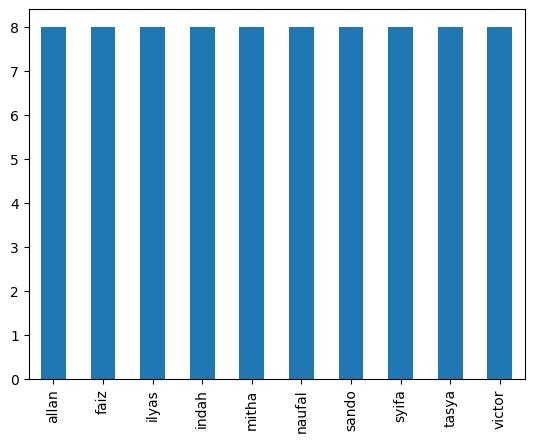

In [ ]:
# Lets see total images and in each category

df['Label'].value_counts().plot.bar()
print(df['Label'].value_counts())

print("\n Total images: ", df.shape[0])

In [ ]:
from keras.utils.sidecar_evaluator import optimizer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout, BatchNormalization


def SaNizNet_model(input_shape):
  model = Sequential()

  model.add(Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same"))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(3,3)))

  model.add(Conv2D(filters=512, kernel_size=(5,5), strides=(1,1), padding="same"))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same"))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding="same"))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding="same"))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(3,3)))

  model.add(Flatten())

  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(class_number))
  model.add(Activation('softmax'))

  model.compile(
      loss='categorical_crossentropy',
      optimizer='sgd',
      metrics=['accuracy']
  )

  return model


In [ ]:
from keras import backend as K

if K.image_data_format() == 'channel_first':
  input_shape = (1, img_width, img_height)
else:
  input_shape = (img_width, img_height, 1)

In [ ]:
model = SaNizNet_model(input_shape)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 128)       15616     
                                                                 
 activation (Activation)     (None, 54, 54, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       819456    
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)       0

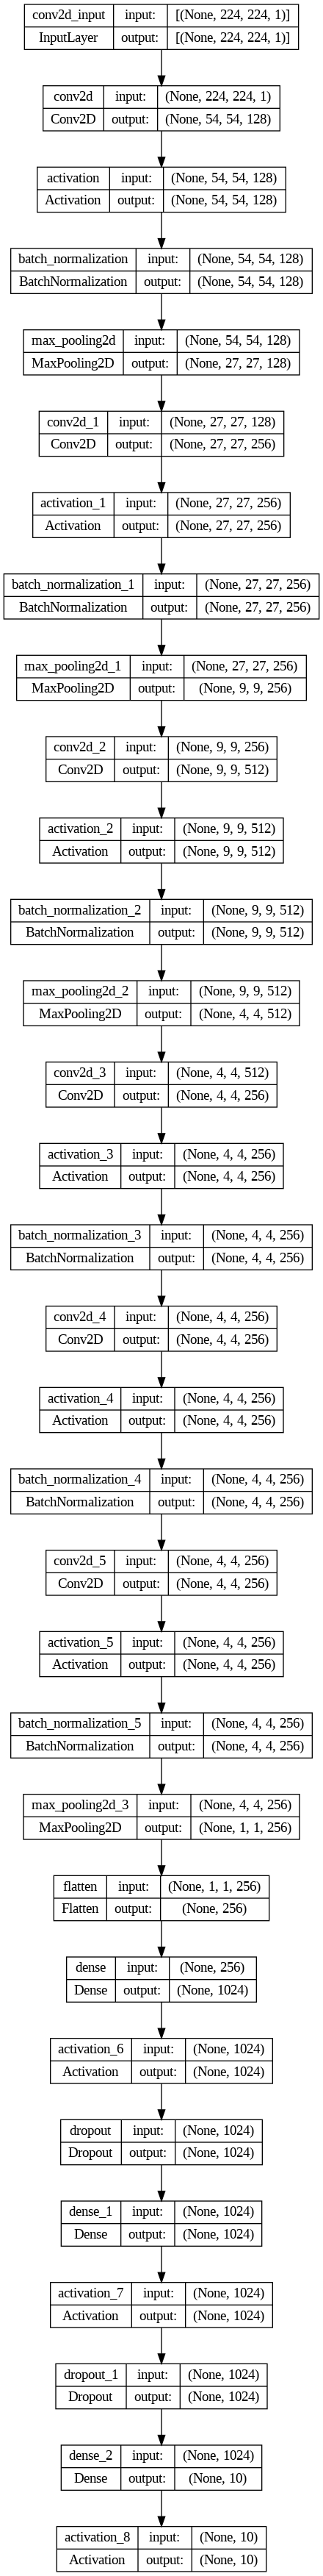

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_dataframe(
    df,
    x_col='Path',
    y_col='Label',
    target_size=(img_width, img_height),
    batch_size=4,
    class_mode='categorical',
    color_mode = 'grayscale'
)

Found 80 validated image filenames belonging to 10 classes.


In [ ]:
# validation_datagen = ImageDataGenerator(
#     rescale= 1./ 255,
#     shear_range = 0.2,
#     zoom_range = 0.2,
#     horizontal_flip = True
# )

# validation_generator = validation_datagen.flow_from_dataframe(
#     validation_df,
#     x_col='Path',
#     y_col='Label',
#     target_size=(img_width, img_height),
#     class_mode='categorical'
# )

In [ ]:
epochs = 50
# batch_size = 6
num_train = len(df)
# num_validation = len(validation_df)

# train_batch = num_train//batch_size
# validation_batch = num_validation//batch_size

# print(train_batch)
# print(validation_batch)

In [ ]:
#Fungsi callback yang akan menghentikan trainning apabila akurasi melebihi 98.5%

# import tensorflow as tf

# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy') >= 0.999):
#       print("\nAkurasi melebihi 99.5%, trainning dihentikan!")
#       self.model.stop_training = True

# callbacks = myCallback()

In [ ]:
history = model.fit(
    train_generator,
    epochs = epochs,
    # steps_per_epoch = train_batch,
    # validation_data=validation_generator,
    # callbacks = [callbacks]
    # validation_steps = validation_batch
)

Epoch 1/50
20/20 [==============================] - 25s 1s/step - loss: 4.3316 - accuracy: 0.1000
Epoch 2/50
20/20 [==============================] - 11s 545ms/step - loss: 2.9269 - accuracy: 0.1625
Epoch 3/50
20/20 [==============================] - 12s 585ms/step - loss: 2.4814 - accuracy: 0.2250
Epoch 4/50
20/20 [==============================] - 12s 626ms/step - loss: 2.3153 - accuracy: 0.1500
Epoch 5/50
20/20 [==============================] - 11s 539ms/step - loss: 1.9733 - accuracy: 0.3500
Epoch 6/50
20/20 [==============================] - 13s 654ms/step - loss: 2.0478 - accuracy: 0.2625
Epoch 7/50
20/20 [==============================] - 13s 670ms/step - loss: 1.8015 - accuracy: 0.3000
Epoch 8/50
20/20 [==============================] - 16s 790ms/step - loss: 1.8302 - accuracy: 0.3375
Epoch 9/50
20/20 [==============================] - 13s 672ms/step - loss: 1.7772 - accuracy: 0.3875
Epoch 10/50
20/20 [==============================] - 13s 673ms/step - loss: 1.4148 - accuracy:

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
import tensorflow as tf

# Memuat model yang sudah ada
# model = tf.keras.models.load_model('model.h5')  # Ganti 'model.h5' dengan nama file model Anda

# Mendapatkan daftar output layer
output_layers = model.output_names

# Mendapatkan daftar kelas dari outpu t layer pertama
output_layer_name = output_layers[0]
output_layer = model.get_layer(output_layer_name)
classes = output_layer.get_config()

# Menampilkan daftar kelas
print("Daftar Kelas:")
for i, class_label in enumerate(classes):
    print(f"Kelas {i}: {class_label}")


Daftar Kelas:
Kelas 0: name
Kelas 1: trainable
Kelas 2: dtype
Kelas 3: activation


In [ ]:
model.save('/content/drive/MyDrive/Excel Only/SanFaizNet.h5')

Saving 2023-06-08_165712-871277.jpg to 2023-06-08_165712-871277.jpg


/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 419ms/step
Hasil prediksi:
Kelas: victor


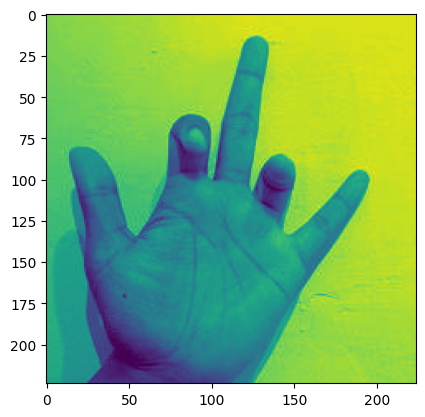

In [ ]:
#Pengujian Satu Data Testing
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
# from keras.preprocessing import image
# from tf.keras.utils import load_img
import tensorflow as tf
import numpy as np

uploaded = files.upload()

file_path = list(uploaded.keys())[0]


def load_image(file_path):
  # img = image.load_img(file_path, target_size=(224, 224))  # Mengganti ukuran gambar sesuai dengan model Anda
  img = load_img(file_path, target_size=(224,224), grayscale=True, color_mode='grayscale')
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255.  # Normalisasi piksel

  return img

img = load_image(file_path)

# Melakukan prediksi
def predict_image_class(image):
  prediction = model.predict(image)
  predicted_class = np.argmax(prediction)

  if predicted_class == 0:
    name_class = 'allan'
  elif predicted_class == 1:
    name_class = 'faiz'
  elif predicted_class == 2:
    name_class = 'ilyas'
  elif predicted_class == 3:
    name_class = 'indah'
  elif predicted_class == 4:
    name_class = 'mitha'
  elif predicted_class == 5:
    name_class = 'naufal'
  elif predicted_class == 6:
    name_class = 'sando'
  elif predicted_class == 7:
    name_class = 'syifa'
  elif predicted_class == 8:
    name_class = 'tasya'
  elif predicted_class == 9:
    name_class = 'victor'
  else:
    name_class = 'undefined'

  return name_class

name_class = predict_image_class(img)

# Menampilkan hasil prediksi
print('Hasil prediksi:')
print('Kelas:', name_class)

img_shw = mpimg.imread(file_path)
plt.imshow(img_shw)

In [ ]:
# Ubah 'path_ke_folder' dengan direktori tempat folder-folder dan file-file yang ingin Anda ambil path dan beri label
folder_path = '/content/drive/MyDrive/Dataset/dataset/test'

# Daftar path dan nama file
file_paths = []
file_names = []

# Meloopi setiap file dalam folder
for file_name in os.listdir(folder_path):
    # Membangun path lengkap ke file
    file_path = os.path.join(folder_path, file_name)

    # Memeriksa apakah path yang ditemukan adalah file
    if os.path.isfile(file_path):
        file_paths.append(file_path)
        file_names.append(file_name)

# Membuat dataframe dari path dan nama file
pred_df = pd.DataFrame({'File_Path': file_paths, 'File_Name': file_names})
pred_df

,File_Path,File_Name
0,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-840187.jpg
1,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-869264.jpg
2,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-847194.jpg
3,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-859263.jpg
4,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-855254.jpg
5,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-871277.jpg
6,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-837188.jpg
7,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-834185.jpg
8,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-851194.jpg
9,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-842187.jpg


In [ ]:
import pandas as pd
import cv2

# Membaca dataframe dari file CSV

# Fungsi untuk meload gambar dari path dan filename
def load_gambar(row):
    path = row['File_Path']  # Kolom 'path' dalam dataframe
    filename = row['File_Path']  # Kolom 'filename' dalam dataframe
    image_path = path + '/' + filename  # Path lengkap gambar
    image = cv2.imread(image_path)  # Meload gambar menggunakan OpenCV
    return image

# Menerapkan fungsi load_image pada setiap baris dataframe
test_df = pred_df
test_df['image'] = test_df.apply(load_gambar, axis=1)

# Cetak dataframe dengan kolom baru 'image' yang berisi gambar yang telah diload
test_df

,File_Path,File_Name,image
0,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-840187.jpg,None
1,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-869264.jpg,None
2,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-847194.jpg,None
3,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-859263.jpg,None
4,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-855254.jpg,None
5,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-871277.jpg,None
6,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-837188.jpg,None
7,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-834185.jpg,None
8,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-851194.jpg,None
9,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-842187.jpg,None


In [ ]:
from PIL import Image

class_list = []

for i in range(len(test_df)):
  img = load_image(str(test_df['File_Path'][i]))
  name_class = predict_image_class(img)
  class_list.append(name_class)
  print(name_class)

test_df['Label'] = class_list
test_df

/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
mitha
1/1 [==============================] - 0s 58ms/step
sando
1/1 [==============================] - 0s 61ms/step
ilyas
1/1 [==============================] - 0s 62ms/step
indah
1/1 [==============================] - 0s 70ms/step
mitha
1/1 [==============================] - 0s 62ms/step
victor
1/1 [==============================] - 0s 64ms/step
ilyas
1/1 [==============================] - 0s 66ms/step
indah
1/1 [==============================] - 0s 63ms/step
allan
1/1 [==============================] - 0s 106ms/step
tasya
1/1 [==============================] - 0s 107ms/step
syifa
1/1 [==============================] - 0s 113ms/step
allan
1/1 [==============================] - 0s 104ms/step
faiz
1/1 [==============================] - 0s 101ms/step
faiz
1/1 [==============================] - 0s 104ms/step
naufal
1/1 [==============================] - 0s 106ms/step
sando
1/1 [==============================] - 0s 70ms/step
tasya
1/1 [==

,File_Path,File_Name,image,Label
0,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-840187.jpg,None,mitha
1,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-869264.jpg,None,sando
2,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-847194.jpg,None,ilyas
3,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-859263.jpg,None,indah
4,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-855254.jpg,None,mitha
5,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-871277.jpg,None,victor
6,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-837188.jpg,None,ilyas
7,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-834185.jpg,None,indah
8,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-851194.jpg,None,allan
9,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-842187.jpg,None,tasya


In [ ]:
test_df.drop('image', axis=1)

,File_Path,File_Name,Label
0,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-840187.jpg,mitha
1,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-869264.jpg,sando
2,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-847194.jpg,ilyas
3,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-859263.jpg,indah
4,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-855254.jpg,mitha
5,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-871277.jpg,victor
6,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-837188.jpg,ilyas
7,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-834185.jpg,indah
8,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-851194.jpg,allan
9,/content/drive/MyDrive/Dataset/dataset/test/20...,2023-06-08_165712-842187.jpg,tasya


In [ ]:
test_df.to_excel("/content/drive/MyDrive/Excel Only/Hasil-Lomba.xlsx", index=True)